# PCA and autoencoders

此份 Notebook 主要是參考 李弘毅的 PCA&AutoEncoder 教學影片
連結如下
http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/PCA.mp4

In [2]:
# Numpy is our primary dependency
import numpy as np

# Import datasets from scikit-learn only to get the iris data set
from sklearn import datasets

# We will need some plotting too
import matplotlib.pyplot as plt


# import seaborn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

#假設你要讓每一個 chart inline 獨立顯示
%matplotlib inline 

## The Dataset

我們使用 MMinst DataSet 作為練習的資料來洚

### Pre-processing of data

In [3]:
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np


mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

We will need to pre-process the data in various ways. For PCA, we will need all features to be centered (i.e. with mean zero) and with unit standard deviation.

For the autoencoding section, we will need to make sure that all values are between 0 and 1. We will need these data in transposed form as well.

In [13]:
# 他是一個 8*8 影像矩陣
X.shape

(1797, 64)

這個數字 #5#


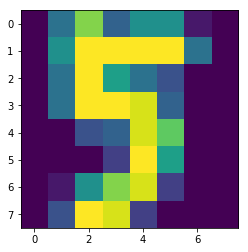

In [5]:
print("這個數字 #{}#".format(y[33]))
plt.imshow(X[33].reshape(8,8), interpolation='nearest')
plt.show()

## PCA 核心研究算法
* 因為是要進行 Feature Dimession Reduction，所以先計算各feature間 distribution 的covariance，故先產出 covariance matrix
* 接下對 cov matrix ，求出 eigen_value 及 eigen_vector
* 直觀的看法如下例這張圖

<img width="50%" src="./imgs/svd.png" >

## 接下來算出各 Feature間的 covarience matrix(因為要對 Feature 進行降維)

In [6]:
# 計算 varience 前，先計算各 feature 的 mean
mean = np.mean(X,axis=0)
# 計算每個一點和 mean 之間的差，及為各資料點的varience
x_x = X-mean

In [9]:
# 計算 covarience matrix
cov = np.matmul(x_x.transpose(),x_x)/mean.shape[0]

In [10]:
# 用 np 的 function 算出 eigenvalue 及 eigevecto
value,vec = np.linalg.eig(cov)

In [20]:
# 確認一下 shape 是否為 8*8 ，因為是計算 feature 間的 covairence
value.shape

(64,)

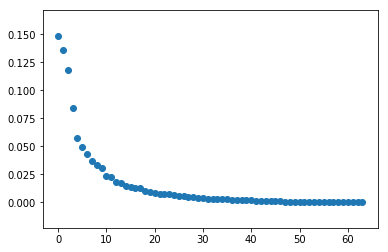

In [14]:
# 再來看 eigen_value 遞減佔比，由此可以看出大約前 8 個 componet 就佔了大部份
y_eigen_value = []
for i in range(8*8):
    y_eigen_value.append(value[i]/np.sum(value))

plt.scatter(range(0,8*8), y_eigen_value , cmap=plt.cm.spectral)
plt.show()

In [11]:
# 因為 PCA 產出的值為負到正的浮點數，故需先作平移，才能視覺化成現
new_vec = ((vec+1)*128).astype(int)

In [12]:
# 來看一下 componet

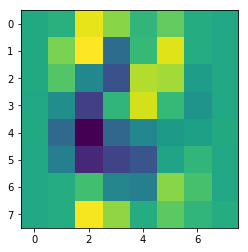

In [13]:
plt.imshow(new_vec[:,0].reshape(8,8), interpolation='nearest')

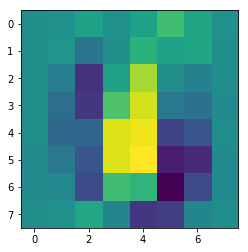

In [14]:
plt.imshow(new_vec[:,1].reshape(8,8), interpolation='nearest')

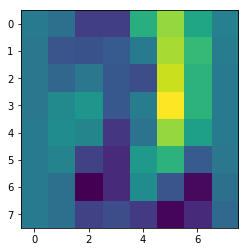

In [15]:
plt.imshow(new_vec[:,2].reshape(8,8), interpolation='nearest')

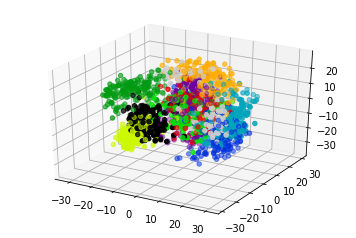

In [15]:
# new_X 為降為過後，降成三維
new_X = np.matmul(X,vec[:,:3])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

In [16]:
# 將投影的結果，進行 Normalize ，以便好計算兩兩間的 similarity
from sklearn.preprocessing import normalize
new_X_normlized = normalize(new_X)

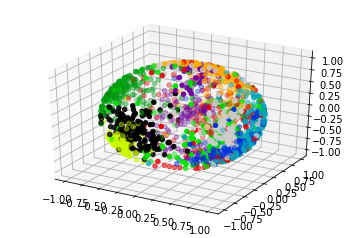

In [19]:
# 因為進行 normalize 了，故成現球形的分佈
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.scatter(new_X_normlized[:, 0], new_X_normlized[:, 1], new_X_normlized[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

這個數字 #2#


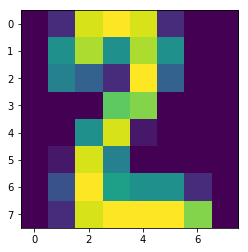

這個數字 #2#


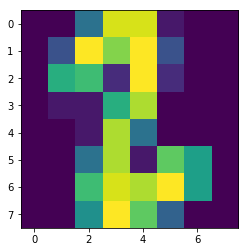

這個數字 #2#


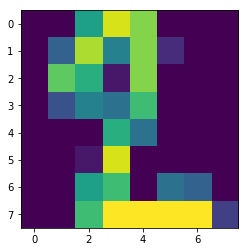

這個數字 #2#


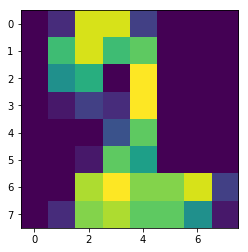

這個數字 #2#


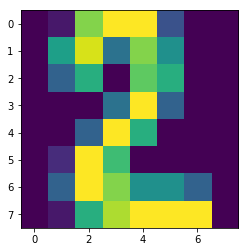

這個數字 #2#


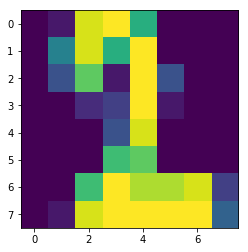

這個數字 #2#


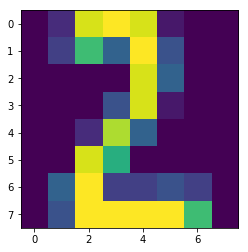

這個數字 #2#


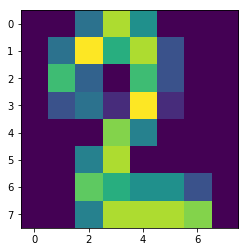

這個數字 #8#


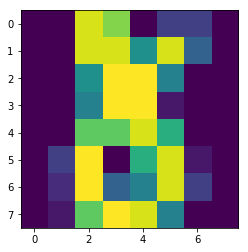

這個數字 #2#


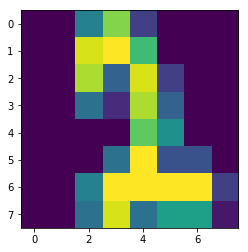

這個數字 #2#


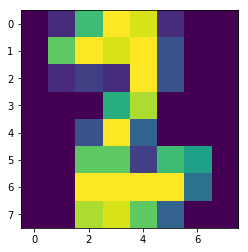

這個數字 #8#


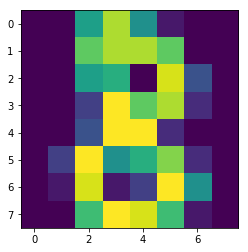

這個數字 #8#


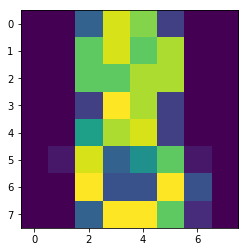

這個數字 #8#


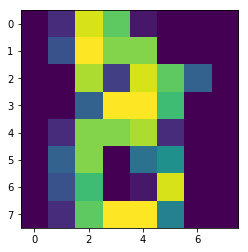

這個數字 #2#


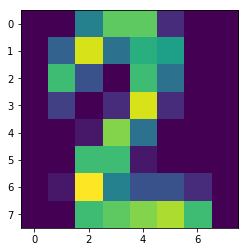

這個數字 #2#


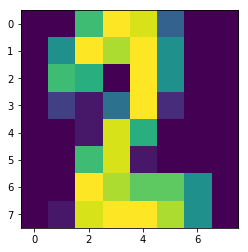

這個數字 #2#


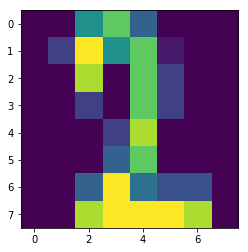

這個數字 #2#


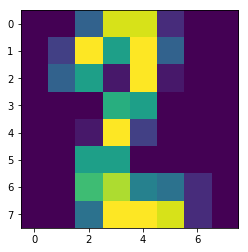

這個數字 #2#


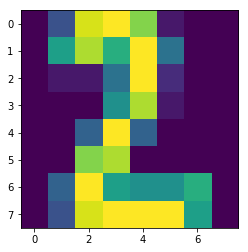

這個數字 #1#


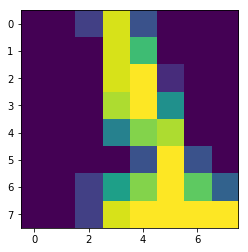

這個數字 #8#


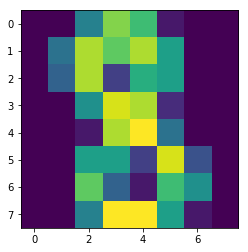

這個數字 #2#


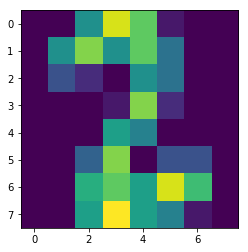

這個數字 #2#


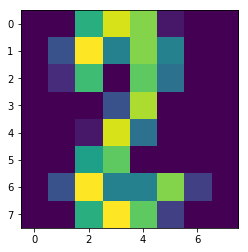

這個數字 #2#


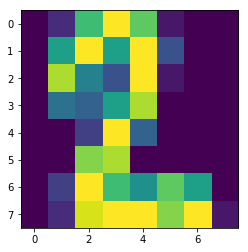

這個數字 #2#


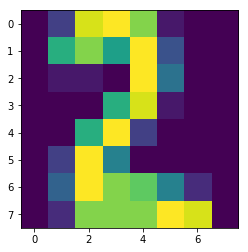

這個數字 #3#


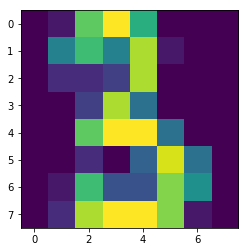

這個數字 #2#


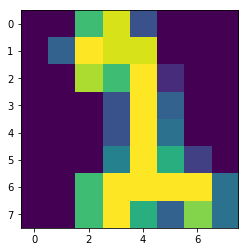

這個數字 #2#


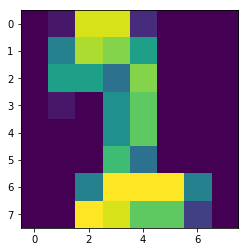

這個數字 #2#


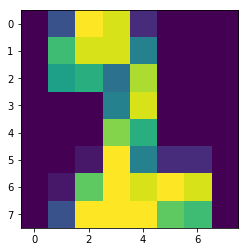

這個數字 #2#


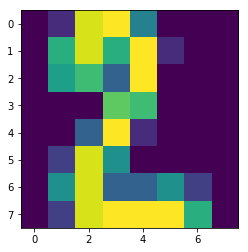

In [19]:
# 計算看看 similarity

test_index = 333
new_X_normlized

sims = np.matmul(new_X_normlized,new_X_normlized[test_index])

for i in sims.argsort()[-30:][::-1]:
    print("這個數字 #{}#".format(y[i]))
    plt.imshow(X[i].reshape(8,8), interpolation='nearest')
    plt.show()



## 使用現成的套件看看跟我自已算的是否有一樣

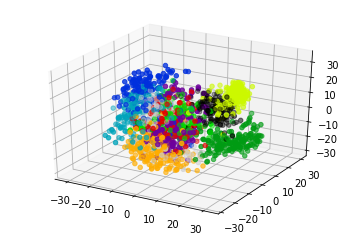

In [19]:
pca = decomposition.PCA(n_components=3)
new_X = pca.fit_transform(X)

fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

## Autoencoders by Keras

* 其實 PCA 降維的動作，就是找出一組 W1 進行空間轉換
* 如果再進一步思考，此降為後的 encoded vector ，再來另外一組 W2，還原成 X
* PCA另外轉換思考 就是想要 minizie  X 轉換前後的差，故可以想像成底下的 auto encoder
<img width='50%' src='imgs/pcaautoencoder.png' >


In [22]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

## load data

In [21]:
# 為何要 load 另外一組 dataset 呢，原因是因為要 sklearn 的 data 量太少，經過實驗後無學到好的 encode 效果
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


# 設計 autoencoder 的 net
* 分別為 W1
* $e^{i\pi} + 1 = 0$


In [79]:
h1_size = 32
h2_size = 32
input_img = Input(shape=(28*28,))
encoder = Dense(h1_size,activation='relu')(input_img)
hidden = Dense(h2_size,activation='relu')(encoder)

decoder = Dense(28*28,activation='relu')(hidden)
autoencoder = Model(input_img, decoder)


autoencoder.compile(loss='binary_crossentropy',optimizer='adadelta')

In [81]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## training 

In [82]:
encoder_model = Model(input_img,encoder)
decoder_model = Model(input_img,decoder)

In [83]:

autoencoder.fit(x_train, x_train,
                epochs=500,
                verbose=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
1s - loss: 0.5098 - val_loss: 0.3683
Epoch 2/500
1s - loss: 0.3532 - val_loss: 0.3353
Epoch 3/500
1s - loss: 0.3201 - val_loss: 0.3080
Epoch 4/500
1s - loss: 0.2987 - val_loss: 0.2927
Epoch 5/500
1s - loss: 0.2896 - val_loss: 0.2849
Epoch 6/500
1s - loss: 0.2827 - val_loss: 0.2800
Epoch 7/500


KeyboardInterrupt: 

In [84]:
# encode and decode some digits
# note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder_model.predict(x_test[:100].reshape(100,28*28))

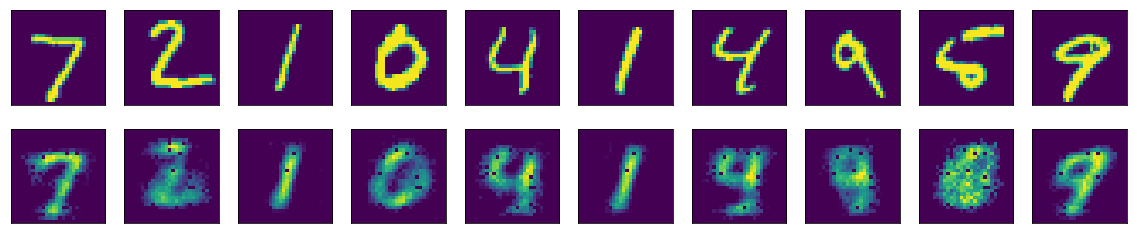

In [85]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [86]:
new_X = encoder_model.predict(x_test.reshape(x_test.shape[0],28*28))

In [87]:
new_X = (new_X*255).astype('int32')

In [88]:
import numpy as np
from sklearn.manifold import TSNE
X = new_X[:1000]
X_embedded = TSNE(n_components=3).fit_transform(X)
X_embedded.shape

(1000, 3)

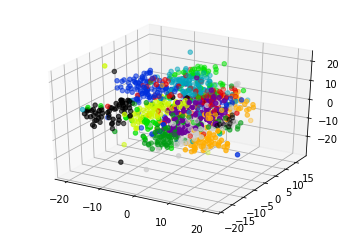

In [89]:


fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=y_test[:1000], cmap=plt.cm.spectral)
plt.show()

# Deep AutoEncoder

In [32]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [33]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s - loss: 0.3397 - val_loss: 0.2624
Epoch 2/100
60000/60000 [==============================] - 1s - loss: 0.2579 - val_loss: 0.2521
Epoch 3/100
60000/60000 [==============================] - 1s - loss: 0.2448 - val_loss: 0.2378
Epoch 4/100
60000/60000 [==============================] - 1s - loss: 0.2297 - val_loss: 0.2184
Epoch 5/100
60000/60000 [==============================] - 1s - loss: 0.2123 - val_loss: 0.2053
Epoch 6/100
60000/60000 [==============================] - 1s - loss: 0.2006 - val_loss: 0.1935
Epoch 7/100
60000/60000 [==============================] - 1s - loss: 0.1902 - val_loss: 0.1853
Epoch 8/100
60000/60000 [==============================] - 1s - loss: 0.1831 - val_loss: 0.1798
Epoch 9/100
60000/60000 [==============================] - 1s - loss: 0.1776 - val_loss: 0.1746
Epoch 10/100
60000/60000 [==============================] - 1s - loss: 0.1723 - val_lo

60000/60000 [==============================] - 1s - loss: 0.1037 - val_loss: 0.1027
Epoch 86/100
60000/60000 [==============================] - 1s - loss: 0.1036 - val_loss: 0.1029
Epoch 87/100
60000/60000 [==============================] - 1s - loss: 0.1033 - val_loss: 0.1018
Epoch 88/100
60000/60000 [==============================] - 1s - loss: 0.1033 - val_loss: 0.1013
Epoch 89/100
60000/60000 [==============================] - 1s - loss: 0.1029 - val_loss: 0.1021
Epoch 90/100
60000/60000 [==============================] - 1s - loss: 0.1028 - val_loss: 0.1019
Epoch 91/100
60000/60000 [==============================] - 1s - loss: 0.1027 - val_loss: 0.1013
Epoch 92/100
60000/60000 [==============================] - 1s - loss: 0.1024 - val_loss: 0.1015
Epoch 93/100
60000/60000 [==============================] - 1s - loss: 0.1023 - val_loss: 0.1009
Epoch 94/100
60000/60000 [==============================] - 1s - loss: 0.1022 - val_loss: 0.1007
Epoch 95/100
60000/60000 [=================

In [34]:
decoded_imgs = autoencoder.predict(x_test[:100].reshape(100,28*28))

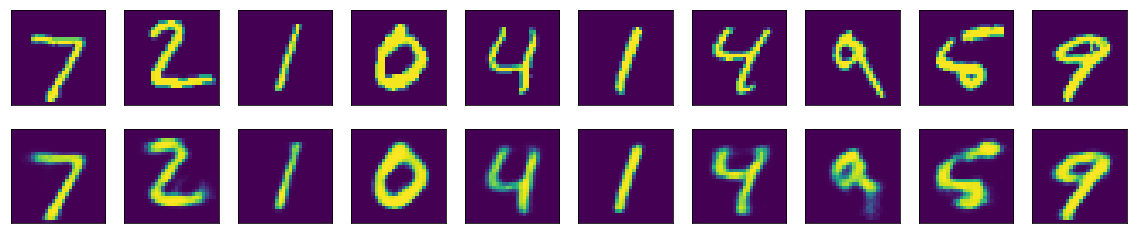

In [35]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional AutoEncoder

In [36]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape
from keras.models import Model
from keras import backend as K

In [46]:
input_img = Input([28*28])
reshape_img = Reshape([28,28,1])(input_img)

conv1 = Conv2D(16,[3,3],padding='same')(reshape_img)
maxpool1 = MaxPooling2D([2,2])(conv1)

conv2 = Conv2D(8,[3,3],padding='same')(maxpool1)
maxpool2 = MaxPooling2D((2, 2), padding='same')(conv2)

conv3 = Conv2D(8, (3, 3), activation='relu', padding='same')(maxpool2)
maxpool3 = MaxPooling2D((2, 2), padding='same')(conv3)
encoder = Model(input_img,maxpool3)

# encoder.compile(optimizer='adadelta', loss='binary_crossentropy')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 8)           584       
__________

In [55]:
re_conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(maxpool3)
up1 = UpSampling2D((2, 2))(re_conv1)


re_conv2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(re_conv2)

re_conv3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(re_conv3)


re_conv4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)

reshape_img2 = Reshape([28*28])(re_conv4)

decoder = Model(input_img,reshape_img2)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_10 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 8)           584       
__________

In [59]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.1007 - val_loss: 0.0994
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.1004 - val_loss: 0.0993
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.1002 - val_loss: 0.0994
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.0999 - val_loss: 0.0988
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.0997 - val_loss: 0.0988
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.0994 - val_loss: 0.0986
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.0992 - val_loss: 0.0977
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.0989 - val_loss: 0.0980
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.0987 - val_loss: 0.0971
Epoch 10/50
60000/60000 [==============================] - 3s - loss: 0.0985 - val_loss: 0.0969

KeyboardInterrupt: 

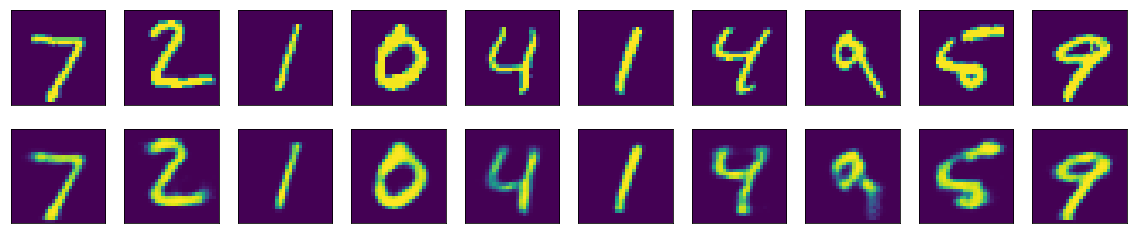

In [60]:
decoded_imgs = autoencoder.predict(x_test[:100].reshape(100,28*28))   
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow((decoded_imgs[i]).reshape(28, 28))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [61]:
#看一下 encode 分佈的結果　

In [80]:
ymaping = [[],[],[],[],[],[],[],[],[],[],]

for idx, val in enumerate(y_test):    
    ymaping[val].append(idx)

In [127]:
test_image = x_test[ymaping[0]]
test_images_encode = encoder.predict(test_image.reshape((test_image.shape[0],28*28)))

In [128]:
test_images_encode.shape

(980, 4, 4, 8)

(980, 128)

In [132]:
X_embedded = TSNE(n_components=1).fit_transform(test_images_encode.reshape((980,4*4*8)))

In [139]:
sorted_index = np.argsort(X_embedded.reshape(980)).tolist()

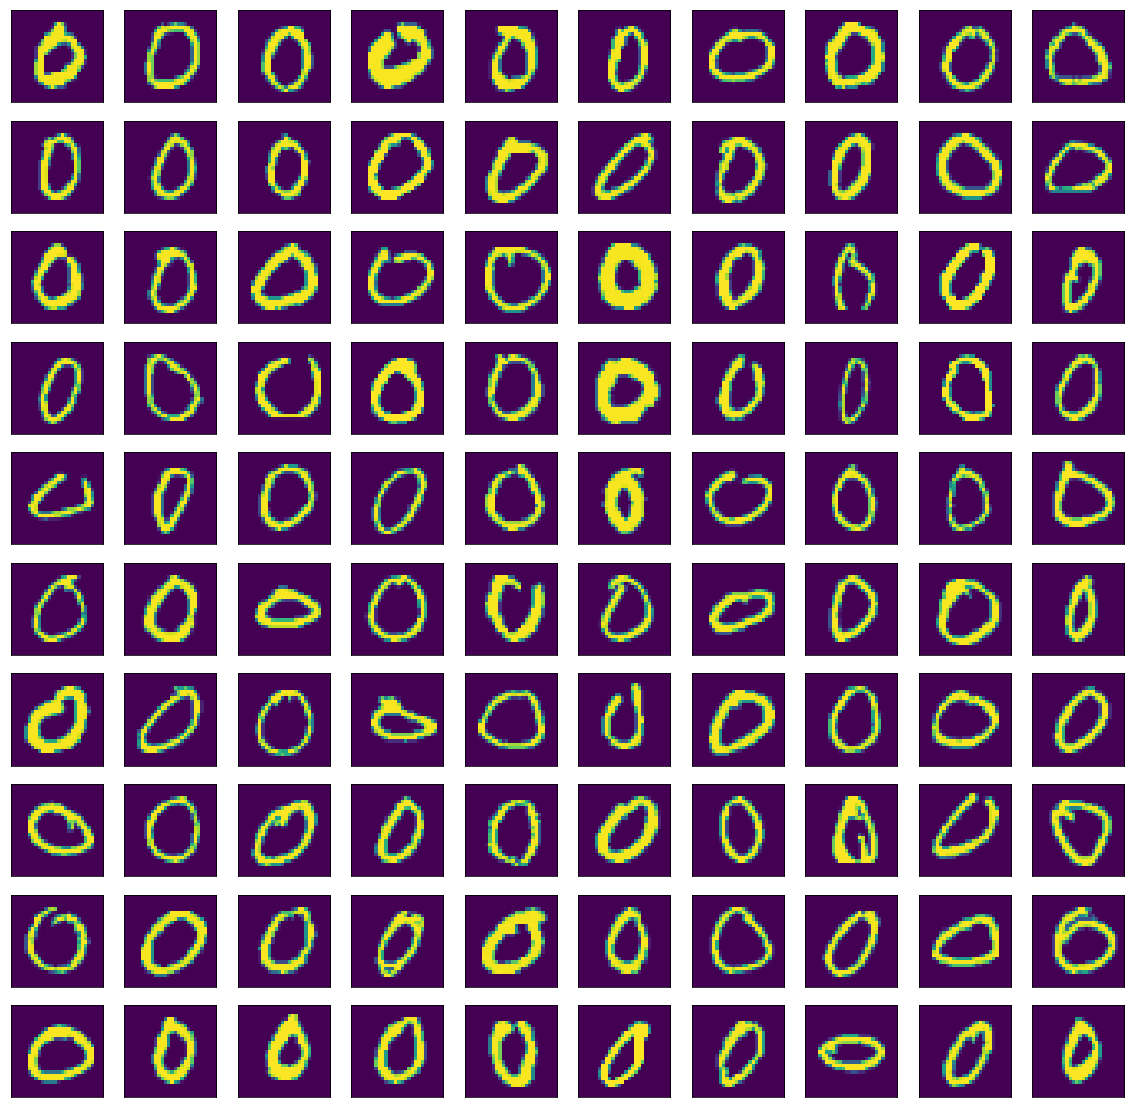

In [175]:
plt.figure(figsize=(20, 20)) 
n = len(sorted_index)
for index,value in enumerate(sorted_index):
    if index >= 100 : break

    ax = plt.subplot(10,10, index+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(  x_test[ymaping[0][index]].reshape(28,28)   , interpolation='nearest')
plt.show()


# VAE AutoEncoder

In [15]:
from keras import objectives
from keras import Input,datasets
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.layers import Input, Dense, Lambda
from keras.models import Model

In [12]:
original_dim = 28*28
batch_size = 128
latent_dim = 3
epsilon_std = 1
intermediate_dim = 512

In [13]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [24]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_sigma/2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [25]:
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [26]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [ ]:
# xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
# kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
# return K.mean(xent_loss + kl_loss)

In [39]:
def vae_loss(x, x_decoded_mean):
    xent_loss = 28*28*objectives.binary_crossentropy(x, x_decoded_mean)
    
    kl_loss = 0.5 * K.sum(K.exp(z_log_sigma) -1 - z_log_sigma + K.square(z_mean) , axis=-1)

    return K.mean(xent_loss + kl_loss)

vae.compile(optimizer='rmsprop', loss=vae_loss)

In [40]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [41]:
x_train = x_train[:x_train.shape[0]/batch_size*128]
x_test = x_test[:x_test.shape[0]/batch_size*128]
y_train = y_train[:y_train.shape[0]/batch_size*128]
y_test = y_test[:y_test.shape[0]/batch_size*128]

In [ ]:
vae.fit(x_train, x_train,
        shuffle=True,
        epochs=1000,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Train on 59904 samples, validate on 9984 samples
Epoch 1/1000
59904/59904 [==============================] - 3s - loss: 206.0593 - val_loss: 205.9018
Epoch 2/1000
59904/59904 [==============================] - 3s - loss: 206.0632 - val_loss: 205.8290
Epoch 3/1000
59904/59904 [==============================] - 3s - loss: 206.0647 - val_loss: 205.8000
Epoch 4/1000
59904/59904 [==============================] - 3s - loss: 206.0645 - val_loss: 205.8019
Epoch 5/1000
59904/59904 [==============================] - 3s - loss: 206.0664 - val_loss: 205.8321
Epoch 6/1000
59904/59904 [==============================] - 3s - loss: 206.0639 - val_loss: 205.8525
Epoch 7/1000
59904/59904 [==============================] - 3s - loss: 206.0621 - val_loss: 205.8115
Epoch 8/1000
59904/59904 [==============================] - 3s - loss: 206.0684 - val_loss: 205.8186
Epoch 9/1000
59904/59904 [==============================] - 3s - loss: 206.0656 - val_loss: 205.8025
Epoch 10/1000
59904/59904 [===============

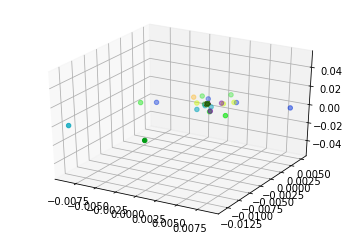

In [128]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)

fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap=plt.cm.spectral)
plt.show()




In [131]:
x_test_gen = vae.predict(x_test, batch_size=batch_size)


In [132]:
# sorted_index = np.argsort(X_embedded.reshape(980)).tolist()

(9984, 784)

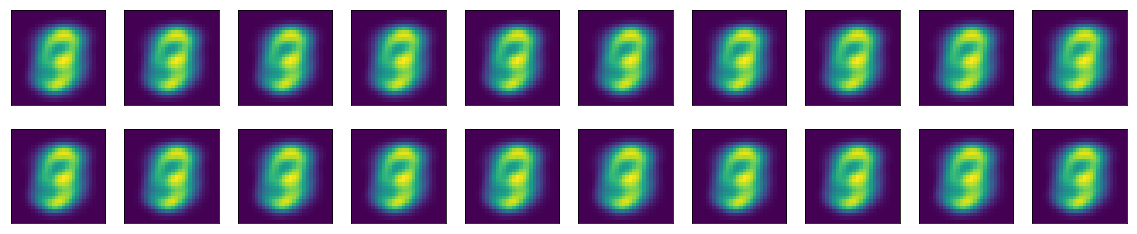

In [140]:
plt.figure(figsize=(20, 4))

for index,value in enumerate(x_test_gen[:20]):
    ax = plt.subplot(2,10, index+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(  value.reshape(28,28)   , interpolation='nearest')
plt.show()


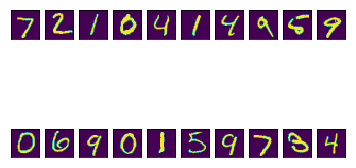

In [141]:
for index,value in enumerate(x_test[:20]):
    ax = plt.subplot(2,10, index+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(  value.reshape(28,28)   , interpolation='nearest')
plt.show()